# Визуализация

На этом семинаре мы поймём, как строить графики, показывающие разные характеристики текстов.

Посмотрим сначала на готовый инструмент для визуализации — [RAWGraph](https://www.rawgraphs.io/). Загрузим туда данные из уже имеющейся [таблички](https://docs.google.com/spreadsheets/d/1XqqOIKMDgjsiV81etygs1EyDIg98RhXPPKYQi0D3QIg/edit?usp=sharing) про длину текста разных авторов.

На самом деле это довольно просто!

[Ссылка](https://colab.research.google.com/drive/1zA-VnzYB9nMbJAj5yeR4lkgktfCrpr-T?usp=sharing) на тетрадку в Google Colab

Импортируем нужные для работы модули

In [1]:
%%capture
!pip install matplotlib
!pip install seaborn

In [2]:
#Работа с таблицами — понадобится, чтобы хранить наш корпус
import pandas as pd

#Выполнение быстрых математических вычислений — пригодится, потому что иначе
#корпус с большим количеством текстов может долго обрабатываться
import numpy as np

#Модуль для работы с графиками
import matplotlib.pyplot as plt

#Ещё модуль построения графиков (строит красивые графики без лишних усилий)
import seaborn as sns
sns.set()

Выкачиваем корпус, который мы создали на предыдущих семинарах. Он будет храниться в табличке Pandas, и что особенно приятно, графики будут строиться на основании таких табличек — ни в какой другой вид их преобразовывать не надо.

In [3]:
#Считываем из файла выкачанный раньше корпус: файл с текстами и словами

corpus_link = 'https://raw.githubusercontent.com/alekseyst/text_analysis_2025/main/Practical_4/panorama_corpus.tsv'
panorama_corpus = pd.read_csv(corpus_link, sep='\t')

corpus_link_words = 'https://raw.githubusercontent.com/alekseyst/text_analysis_2025/main/Practical_4/panorama_corpus_words.tsv'
panorama_corpus_words = pd.read_csv(corpus_link_words, sep='\t')

## Столбчатые диаграммы

Простой способ показать частотность каких-то конкретных слов и сравнить их между собой.

In [4]:
panorama_corpus_words[panorama_corpus_words['lemma'].isin(['новый', 'старый'])].head(15)

,index,text_index,word,lemma,pos,feats,synt,head
1336,97,6,старый,старый,ADJ,Case=Nom|Degree=Pos|Gender=Masc|Number=Sing,amod,16
1638,22,8,старой,старый,ADJ,Case=Gen|Degree=Pos|Gender=Fem|Number=Sing,amod,4
1985,13,10,новую,новый,ADJ,Case=Acc|Degree=Pos|Gender=Fem|Number=Sing,amod,15
2956,153,14,старую,старый,ADJ,Case=Acc|Degree=Pos|Gender=Fem|Number=Sing,amod,20
2970,6,15,нового,новый,ADJ,Case=Gen|Degree=Pos|Gender=Masc|Number=Sing,amod,9
3063,99,15,новой,новый,ADJ,Case=Gen|Degree=Pos|Gender=Fem|Number=Sing,amod,34
3097,133,15,новый,новый,ADJ,Case=Nom|Degree=Pos|Gender=Masc|Number=Sing,amod,9
3188,50,16,новому,новый,ADJ,Case=Dat|Degree=Pos|Gender=Masc|Number=Sing,amod,6
3350,9,17,новой,новый,ADJ,Case=Gen|Degree=Pos|Gender=Fem|Number=Sing,amod,11
3506,13,18,новом,новый,ADJ,Case=Loc|Degree=Pos|Gender=Masc|Number=Sing,amod,16


<Axes: xlabel='lemma', ylabel='count'>

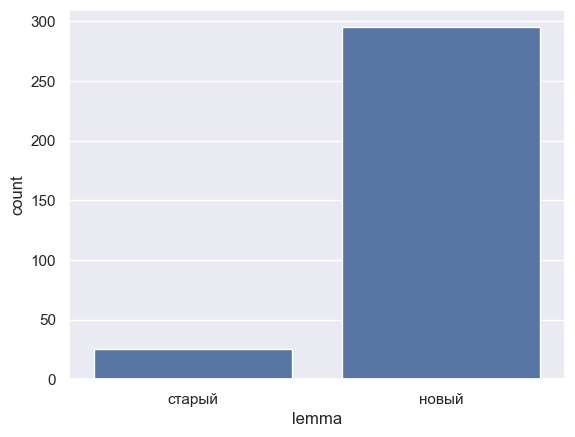

In [5]:
#Готовим данные: фильтруем нужные нам слова

new_old = panorama_corpus_words[panorama_corpus_words['lemma'].isin(['новый', 'старый'])]


#Рисуем диаграмму одной функцией, которая всё посчитает
sns.countplot(x=new_old['lemma'])

In [6]:
#Другой вариант: аггрегируем данные в удобную для чтения таблицу
for_barplot = new_old[['lemma']].groupby('lemma', as_index=False).size()
for_barplot

,lemma,size
0,новый,295
1,старый,25


<Axes: xlabel='lemma', ylabel='size'>

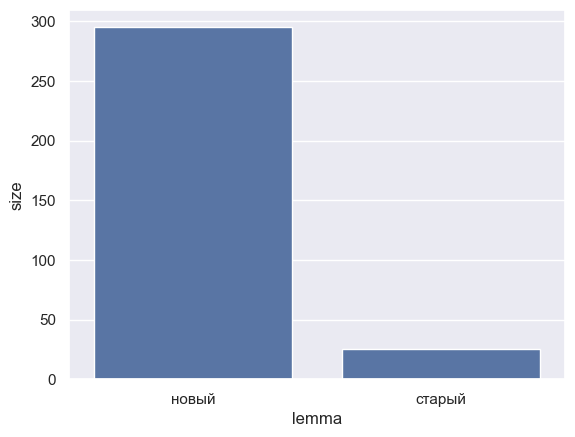

In [7]:
#Рисуем диаграмму по агрегированным данным
sns.barplot(x='lemma', y='size', data=for_barplot)

<Axes: xlabel='lemma', ylabel='size'>

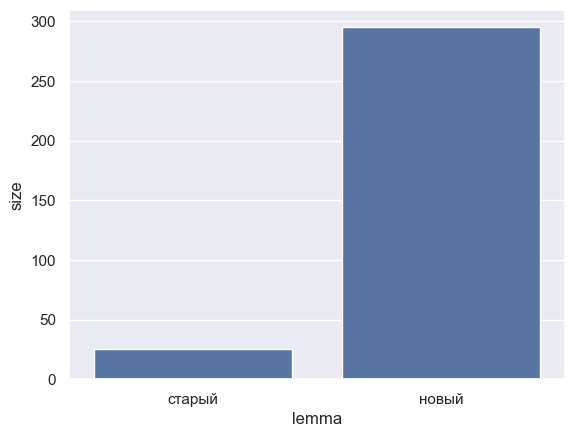

In [8]:
#Как мы видим, порядок элементов вышел разным... Мы можем его менять

order_list = ['старый', 'новый']
sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list)

[Text(0.5, 0, 'Слово'), Text(0, 0.5, 'Количество вхождений')]

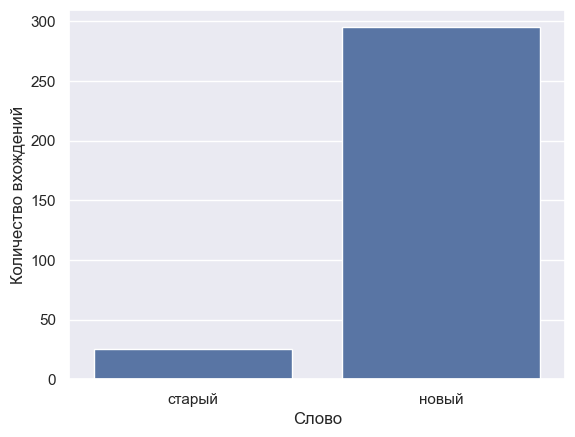

In [9]:
#Конечно, мы можем кастомизировать и много всего другого на этих и других графиках

#Например, поменять названия осей

#Для этого сначала запишем график в переменную
ax = sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list)

#Поменяем названия
ax.set(xlabel='Слово', ylabel='Количество вхождений')

<Axes: xlabel='lemma', ylabel='size'>

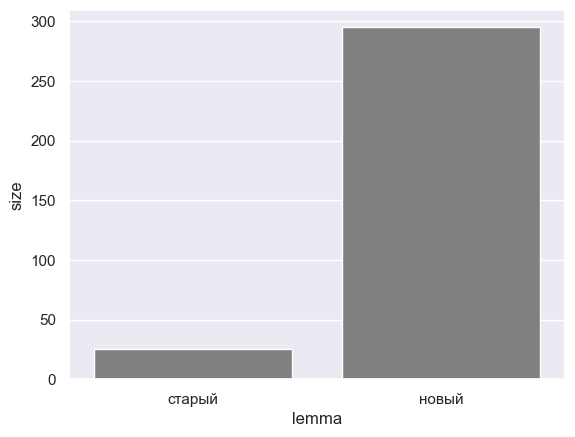

In [10]:
#Например, поменять цвета

sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list,
            color='gray')

<Axes: xlabel='lemma', ylabel='size'>

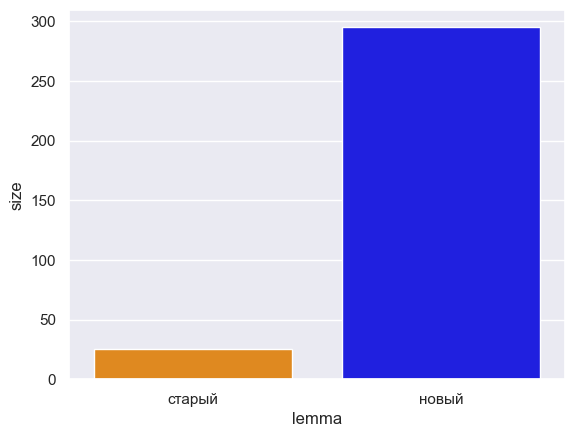

In [11]:
#Или так

sns.barplot(x='lemma', y='size', hue='lemma', data=for_barplot, order=order_list,
            palette=['blue', '#FF8C00'])

Один из многочисленных сайтов, где можно посмотреть коды цветов: [https://htmlcolorcodes.com/](https://htmlcolorcodes.com/).

<Axes: xlabel='lemma', ylabel='size'>

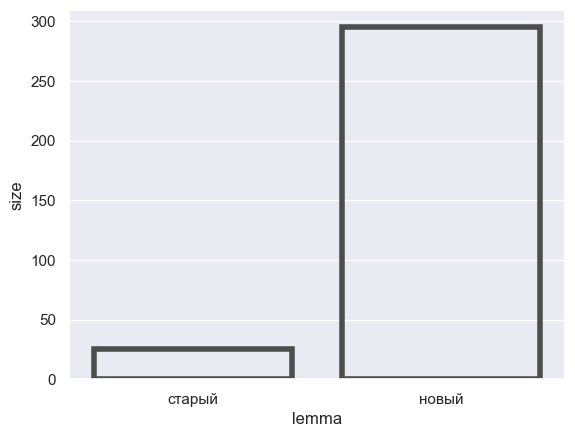

In [12]:
#Или так

sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list,
            linewidth=4, edgecolor=".3", facecolor=(0, 0, 0, 0))

В целом, варьировать график можно в очень широких пределах. Естественно, не только для столбчатых диаграмм, но и для других типов графиков. Обычно, чтобы понять, как это сделать, достаточно сформулировать запрос в поисковике (лучше в Гугле и на английском).

## Задание

Постройде диаграмму, которая показывает соотношение в употребительности трёх любых слов. Дайте осям диаграммы осмысленные названия. Раскрасьте каждый из столбиков в недефолтный цвет.

In [13]:
#Впишите сюда код



In [14]:
#Теперь мы, например, можем увидеть в действии закон Ципфа, который говорит, что
#частотность слова убывает обратно пропорционально его порядковому номеру в частотном списке

#Построим частотный список и отсортируем слова по частотности
freq_list = panorama_corpus_words[panorama_corpus_words['pos'] != 'PUNCT']
freq_list = freq_list[['lemma']].groupby('lemma', as_index=False).size()
freq_list = freq_list.sort_values(by=['size'], ascending=False)

freq_list

,lemma,size
3571,в,4282
5738,и,2737
7472,на,1723
3564,быть,1319
7758,не,1109
...,...,...
24,-страничный,1
25,-таки,1
26,-тысячный,1
27,-цзун,1


In [15]:
#Сбрасываем автоматическую нумерацию
freq_list.reset_index(drop=True).head(10)

,lemma,size
0,в,4282
1,и,2737
2,на,1723
3,быть,1319
4,не,1109
5,с,1093
6,что,1058
7,по,809
8,он,725
9,год,696


<Axes: xlabel='lemma', ylabel='size'>

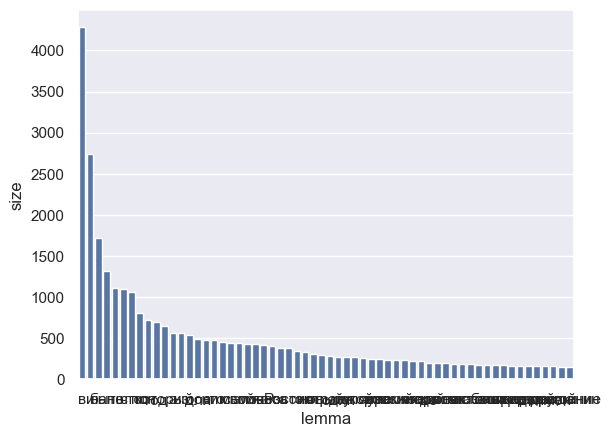

In [16]:
#Строим график

sns.barplot(x='lemma', y='size', data=freq_list[:60])

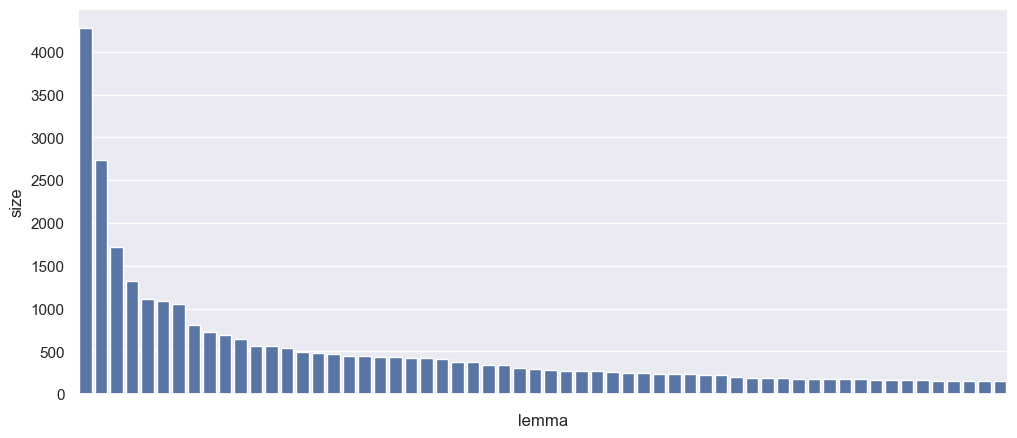

In [17]:
#Кажется, сами слова из обозначений лучше убрать, а график сделать побольше

fig, ax = plt.subplots(figsize=(12, 5))

zipfplot = sns.barplot(x='lemma', y='size', data=freq_list[:60], ax=ax)
zipfplot.set(xticklabels=[])
pass #Эта штука нужна, чтобы нам не вывели кучу мусора при переименовании

## Графики для численной и категориальной переменной

Чтобы не усложнять, снова посмотрим в качетве примера на длину текста

<Axes: xlabel='sphere', ylabel='text_len'>

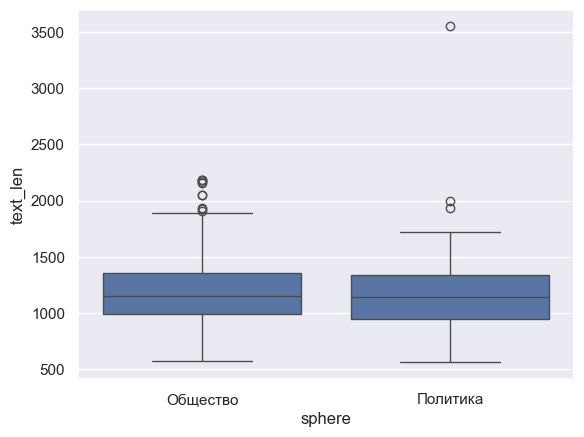

In [18]:
#Считаем длину текста новостей
panorama_corpus['text_len'] = panorama_corpus['text'].map(len)

#Фильтруем только общественные и политические новости
panorama_corpus_for_boxplot = panorama_corpus[panorama_corpus['sphere'].isin(['Общество', 'Политика'])]

#Рисуем ящик с усами
sns.boxplot(x='sphere', y='text_len', data=panorama_corpus_for_boxplot)

## Графики для двух численных переменных

In [19]:
#Посмотрим на таблицу с метаинформацией. Как меняется количество статей в день?

#Сначала получим табличку с этой информацией. Мы сделаем это в pandas, но в целом
#можно, например, получить её руками в excel'е и загрузить готовой

#Разобъём дату по дефису, чтобы иметь отдельно день, месяц и год
panorama_corpus[['day', 'month', 'year']] = panorama_corpus['date'].str.split('-', n=3, expand=True)

#Сделаем, чтобы день был цифрой, а не строчкой
panorama_corpus['day'] = pd.to_numeric(panorama_corpus['day'])

#Отфильтруем статьи за декабрь
dec_articles = panorama_corpus[panorama_corpus['month'] == '12']

#Сгруппируем статьи по дням и подсчитаем количество
dec_sizes =  dec_articles[['day']].groupby('day', as_index=False).size().sort_values('day')

dec_sizes.head(5)

,day,size
0,1,6
1,2,6
2,3,7
3,4,6
4,5,6


<Axes: xlabel='day', ylabel='size'>

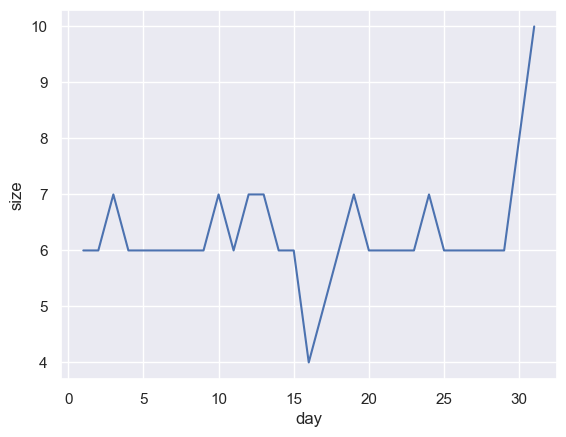

In [20]:
#Теперь мы легко можем построить линию

sns.lineplot(x='day', y='size', data=dec_sizes)

<Axes: xlabel='day', ylabel='size'>

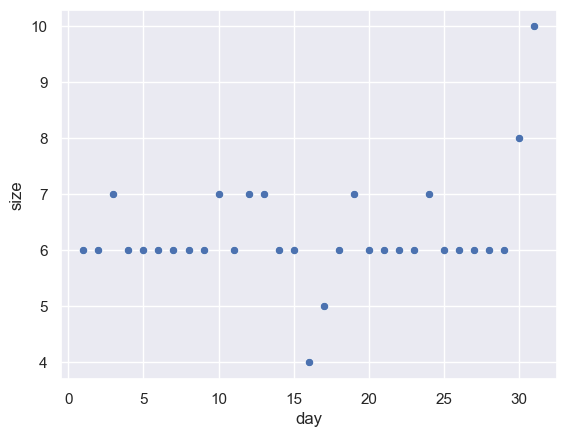

In [21]:
#Или отобразить данные точками

sns.scatterplot(x='day', y='size', data=dec_sizes)

In [22]:
#Здесь точки, конечно, не очень полезны, но если захотеть посмотреть количество
#по разным сферам новотей, то пригодятся

#Сгруппируем статьи по дням и сфере и подсчитаем количество
dec_sizes_sphere =  dec_articles[['sphere', 'day']].groupby(['sphere', 'day'], as_index=False).size()

dec_sizes_sphere.head(7)

,sphere,day,size
0,Наука,3,1
1,Наука,10,1
2,Общество,1,4
3,Общество,2,6
4,Общество,3,3
5,Общество,4,3
6,Общество,5,3


<Axes: xlabel='day', ylabel='size'>

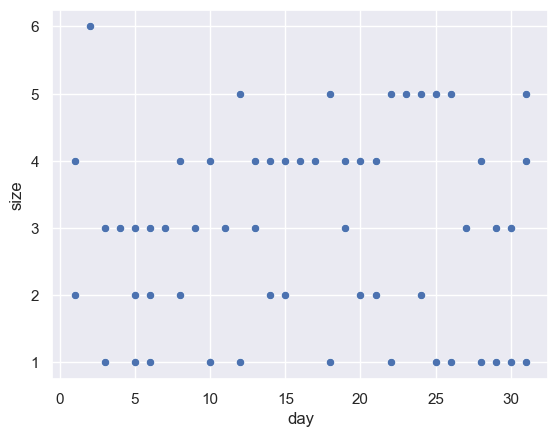

In [23]:
sns.scatterplot(x='day', y = 'size', data=dec_sizes_sphere)

<Axes: xlabel='day', ylabel='size'>

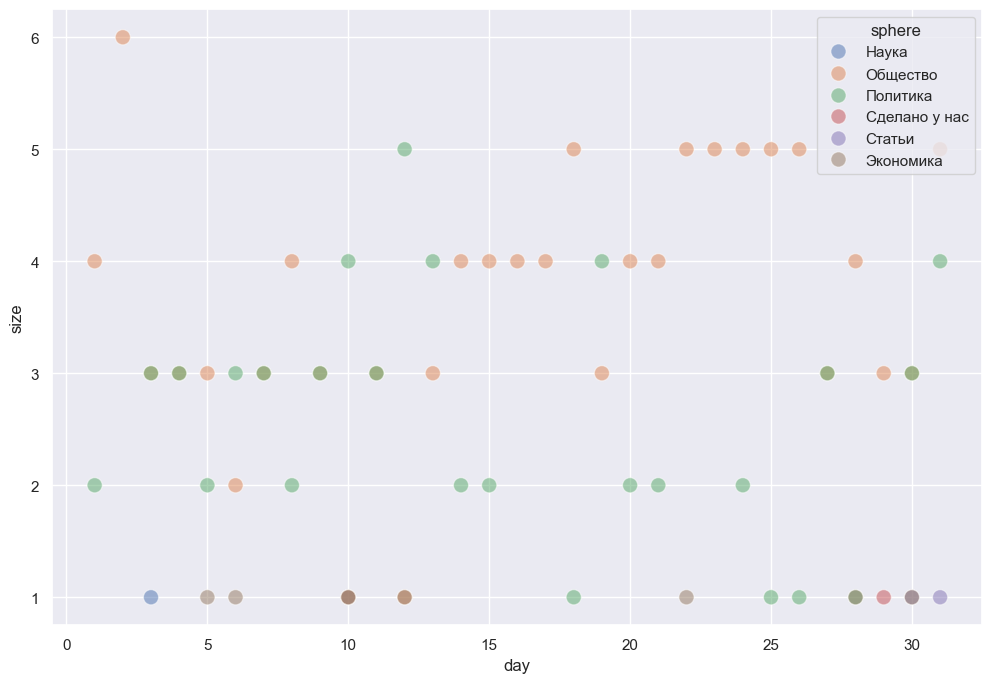

In [24]:
#Сильно больше смысла не стало — но! мы ещё не добавили цвета (hue ниже)
#Заодно увеличим размер (уже делали) и сделаем точки немного прозрачными (alpha)

fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(x='day', y = 'size', hue='sphere', alpha=0.5,
                s=120, data=dec_sizes_sphere, ax=ax)


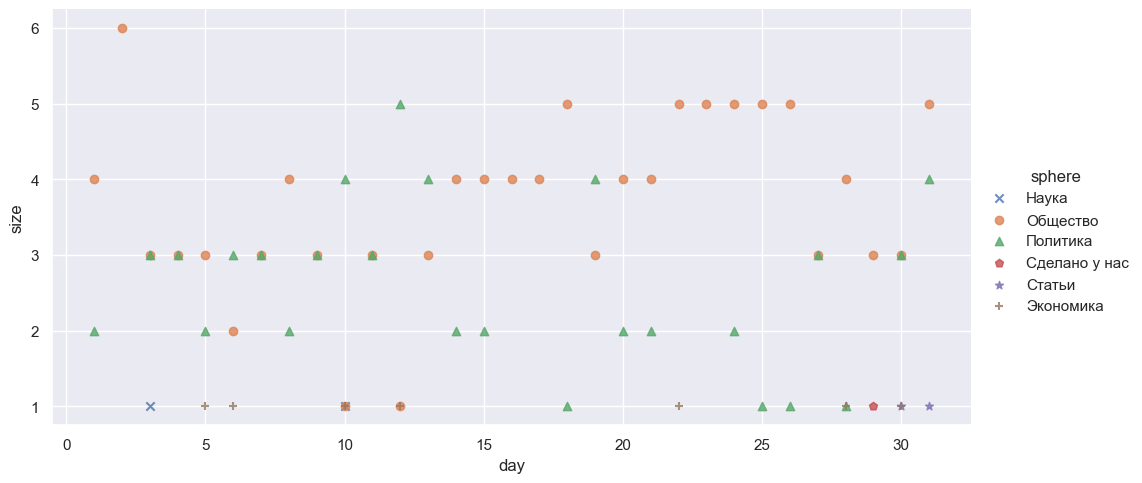

In [25]:
sns.lmplot(x='day', y = 'size', hue='sphere', markers = ['x','o','^','p','*','+'],
          fit_reg=False, height=5, aspect=2, data=dec_sizes_sphere)

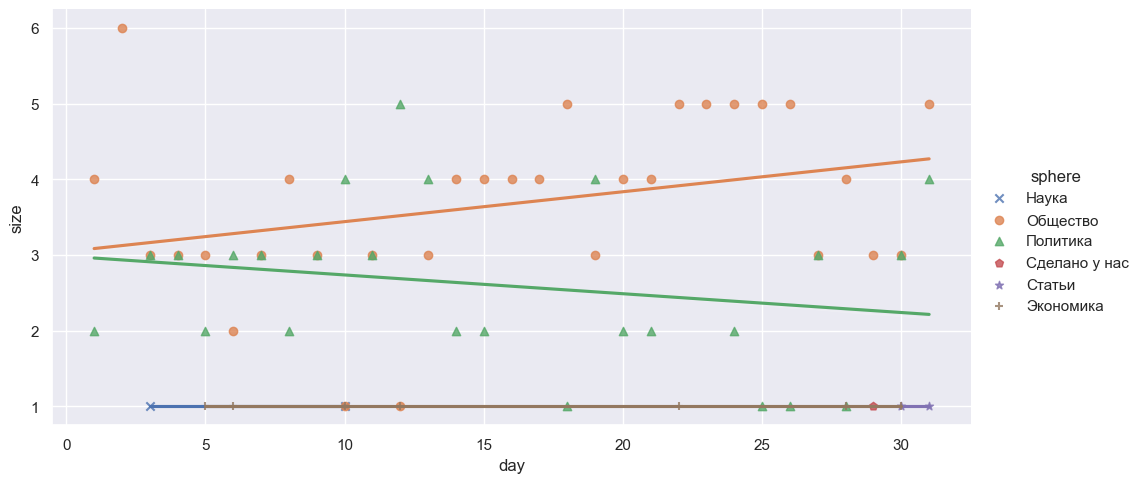

In [26]:
#Можем приблизить прямой

sns.lmplot(x='day', y = 'size', hue='sphere', markers = ['x','o','^','p','*','+'],
           height=5, ci=0, aspect=2, data=dec_sizes_sphere)

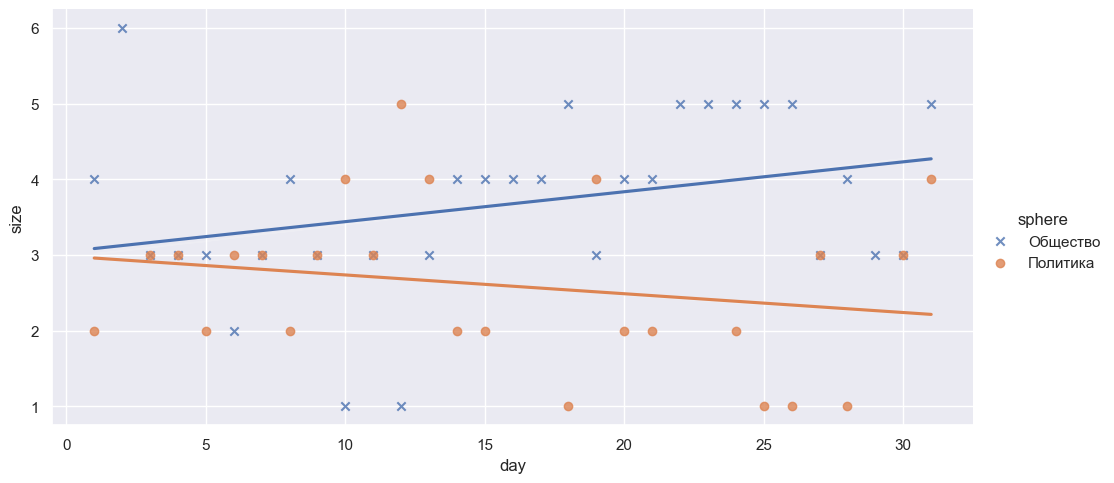

In [29]:
#И убрать лишнее

dec_sizes_sphere_part = dec_sizes_sphere[dec_sizes_sphere['sphere'].isin(['Общество', 'Политика'])]
sns.lmplot(x='day', y = 'size', hue='sphere', markers = ['x','o'],
           height=5, ci=0, aspect=2, data=dec_sizes_sphere_part)

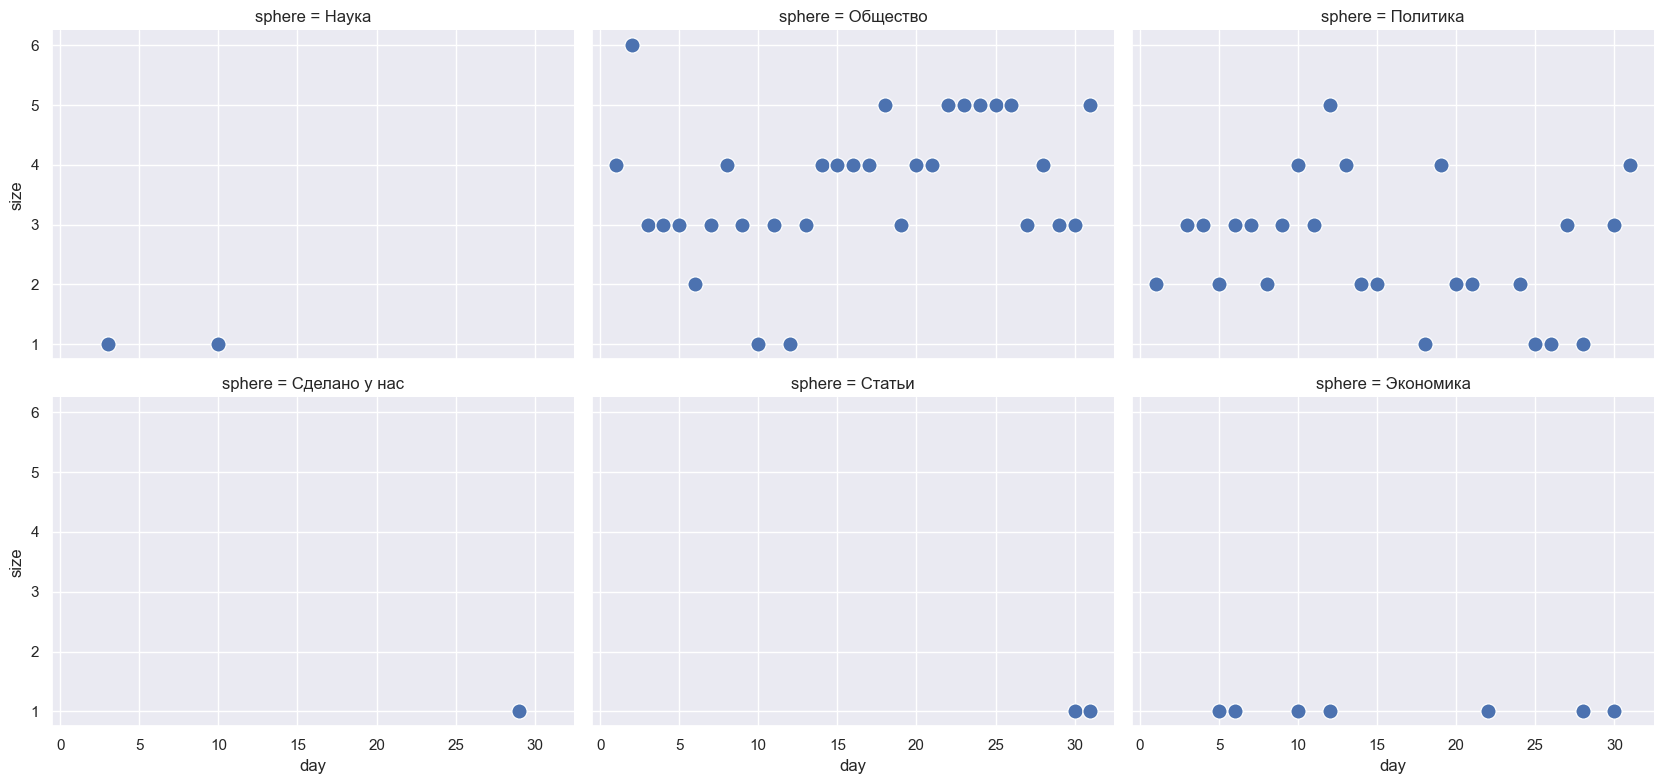

In [27]:
#Кроме того, можем каждую сферу отобразить на отдельном графике

facet_fig = sns.FacetGrid(dec_sizes_sphere, col="sphere", height=4, aspect=1.4, col_wrap=3)
facet_fig.map(sns.scatterplot,'day', 'size', s=120, data=dec_sizes_sphere)

# Итоговые комментарии

У этого семинара будет, может быть, неожиданная мораль. Для других тем, где мы использовали программирование это тоже актуально, но для графиков особенно.

Достаточно сложные структуры мы можем здесь построить буквально в одну строчку кода. Ещё несколько нужны, если вы хотите настроить легенду или изменить размер графика.

Эти строчки кода — и настройки для них — достаточно легко обнаружить простым поиском в интернете. Главное — знать название графика или уметь описать то, что вы в нём хотите поменять (желательно, на английском языке и в Google).

Если вы думаете, что эта тетрадка составлялась каким-то другим образом, вы ошибаетесь:) Её автор в жизни для построения графиков пользуется другим языком программирования (называется R), а конкретные способы построения графиков в Python искал конкретно для этого семинара.